# Tarea 4 Structural equation models

# Autores:
- Jose Gonzalez
- Felipe Almonacid

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

%matplotlib inline


1. Cargue la base de datos y realice los ajustes necesarios para su uso (missing values, recodificar variables, etcetera). Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 

In [2]:
#Se cargan los datos desde los archivos 
junaeb = pd.read_csv('../data/junaeb2.csv')
junaeb.dropna(inplace = True)
junaeb.describe()

,sexo,edad,imce,vive_padre,vive_madre,sk1,sk2,sk3,sk4,sk5,...,sk9,sk10,sk11,sk12,sk13,act_fisica,area,educm,educp,madre_work
count,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,...,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000,57357.000000
mean,0.535349,81.880032,1.018703,0.721464,0.976481,1.106439,1.385550,1.253500,1.246823,1.263699,...,1.322576,1.845651,1.376972,1.489304,1.683474,2.559461,0.907213,13.084175,12.988807,0.102498
std,0.498753,3.767887,1.367474,0.449137,0.161354,0.375685,0.646275,0.572033,0.562731,0.558155,...,0.651805,0.933007,0.658345,0.786647,0.977397,1.070257,0.290137,3.321205,3.420867,0.941063
min,0.000000,62.000000,-5.020000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,80.000000,0.110000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.000000,11.000000,-1.000000
50%,1.000000,81.000000,0.980000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,13.000000,13.000000,0.000000
75%,1.000000,83.000000,1.930000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,14.000000,1.000000
max,1.000000,107.000000,5.040000,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,22.000000,22.000000,1.000000


- Las variables vive_padre y vive_madre tienen un valor maximo de 2, por lo que eliminamos las muestras que tienen esta variable fuera de rango.
- No existen outlayers en las variables sk todas estan en el rango 1,5

In [3]:
#Checkeo que todos los valores en la data tengan un tipo de dato adecuado
outlayers = junaeb.query("vive_padre > 1 or vive_madre > 1").index
junaeb.drop(outlayers, axis=0, inplace=True)
junaeb[["vive_padre","vive_madre"]].describe()
junaeb.dropna(inplace = True)

In [4]:
#sk7 esta desplazada
print("Invertimos el sentido de la variable sk7 para tener el mismo sentido logico, es"
      "decir, convertirlo en un comportamiento positivo desde 1 a 5.")
#usando un map.
junaeb['sk7'] = junaeb['sk7'].map(lambda j:5 - j + 1)
print(junaeb['sk7'])

Invertimos el sentido de la variable sk7 para tener el mismo sentido logico, esdecir, convertirlo en un comportamiento positivo desde 1 a 5.
1        2
3        4
4        3
5        2
6        3
        ..
59994    5
59995    5
59996    5
59997    5
59998    1
Name: sk7, Length: 57247, dtype: int64


2. Usando las variables sk1-sk13 realice un PCA. En particular, identifique los valores propios y determine el numero optimo de componentes. Luego estime y grafique la distribucion de los componentes. Ademas discuta la importancia relativa de las variables sobre cada uno de los componentes estimados. Que se puede concluir de este analisis?

In [5]:
pca = PCA(n_components='mle')

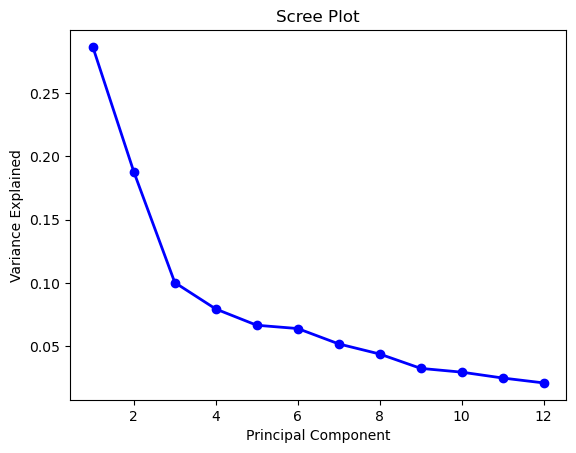

Valores propios: 0.286 0.188 0.1 0.079 0.067 0.064 0.052 0.044 0.032 0.029 0.025 0.021 



In [6]:
Xc = junaeb[[f"sk{i}" for i in range(1,14)]]
Xc.describe()
pca_features = pca.fit_transform(Xc)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
print("Valores propios: ",end="")
for v in pca.explained_variance_ratio_:
    print(f"{np.round(v,3)} ",end="")
print("\n")


- El numero optimo de componentes es 12, puesto que casi todas las variables, explican una parte considerable de la varianza.

3. Con los resultados de la Pregunta 2, mantenga los primeros 3 componentes principales. Graficamente indique si existen diferencias significativas entre grupos usando las siguientes variables: sexo, area, madre_work y act_fisica. Que puede concluir de los resultados?

Usamos las variables sexo, area,madre_work y act_fisica, para ver si existen diferencias significativas entre los componentes de PCA.


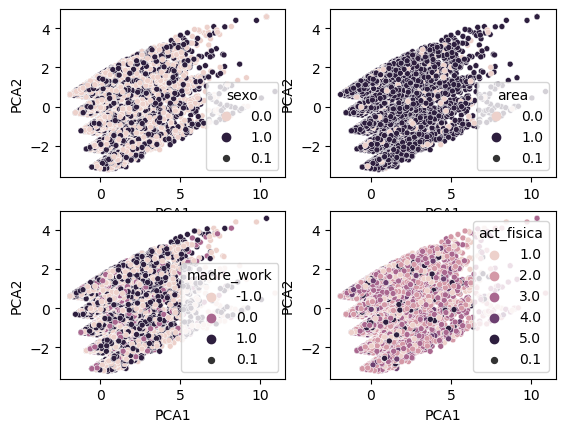

Se logra notar que en cada uno de los cuatros grupos hay una distribución totalmente aleatoria por lo que no vemos diferenciación entre PCA1 y PCA2


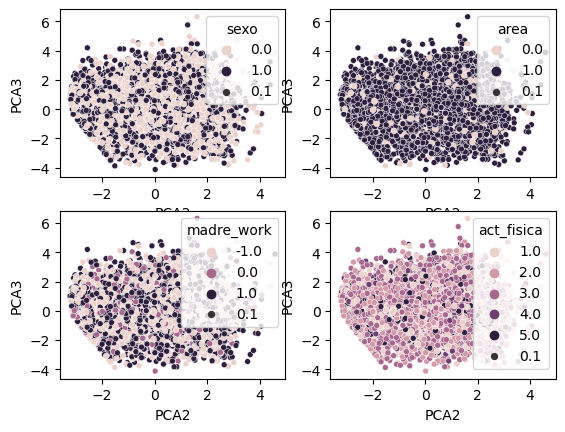

In [7]:
pca_df = pd.DataFrame(data=pca_features,columns = [f"PCA{i}" for i in range(1,13)])
#pca_df = pca_df[["PCA1","PCA2","PCA3"]]
junaeb["puntaje"] = 0
for i in range(1,14):
    junaeb["puntaje"] += junaeb[f"sk{i}"]
junaeb['puntaje'] = junaeb['puntaje'].map(lambda j:j/13)
pca_df['hue'] = junaeb["puntaje"]
pca_df['hue'] = 0
pca_df['hue'] = np.where(junaeb['puntaje'] > 3, 1, pca_df['hue'])
point_size = 0.1

print("Usamos las variables sexo, area,madre_work y act_fisica, para ver si existen diferencias significativas"
" entre los componentes de PCA.")
plt.subplot(2,2,1)
pca_df['sexo'] = junaeb['sexo']
sns.scatterplot(pca_df,x='PCA1', y='PCA2', hue='sexo',size=point_size)
plt.subplot(2,2,2)
pca_df['area'] = junaeb['area']
sns.scatterplot(pca_df,x='PCA1', y='PCA2', hue='area',size=point_size)
plt.subplot(2,2,3)
pca_df['madre_work'] = junaeb['madre_work']
sns.scatterplot(pca_df,x='PCA1', y='PCA2', hue='madre_work',size=point_size)
plt.subplot(2,2,4)
pca_df['act_fisica'] = junaeb['act_fisica']
sns.scatterplot(pca_df,x='PCA1', y='PCA2', hue='act_fisica',size=point_size)
plt.show()

print('Se logra notar que en cada uno de los cuatros grupos hay una distribución totalmente aleatoria'
' por lo que no vemos diferenciación entre PCA1 y PCA2')

plt.subplot(2,2,1)
pca_df['sexo'] = junaeb['sexo']
sns.scatterplot(pca_df,x='PCA2', y='PCA3', hue='sexo',size=point_size)
plt.subplot(2,2,2)
pca_df['area'] = junaeb['area']
sns.scatterplot(pca_df,x='PCA2', y='PCA3', hue='area',size=point_size)
plt.subplot(2,2,3)
pca_df['madre_work'] = junaeb['madre_work']
sns.scatterplot(pca_df,x='PCA2', y='PCA3', hue='madre_work',size=point_size)
plt.subplot(2,2,4)
pca_df['act_fisica'] = junaeb['act_fisica']
sns.scatterplot(pca_df,x='PCA2', y='PCA3', hue='act_fisica',size=point_size)
plt.show()

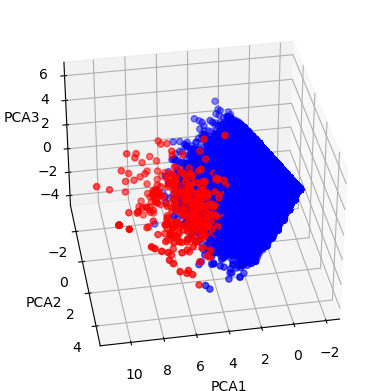

Si hacemos un promedio de los puntajes sk1 a sk13 para cada individuo, y los separamos por grupo, de tal forma que los individuos con puntaje promedio > 3 son rojos y < 3 son azules, podemos ver una clara separacion usando los componentes


In [8]:
from matplotlib.colors import ListedColormap
pca_df['hue'] = "blue"
pca_df['hue'] = np.where(junaeb['puntaje'] > 3, "red", pca_df['hue'])
cmap = ListedColormap(["blue","red"])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pca_df['PCA1'], pca_df['PCA2'], pca_df['PCA3'],c=junaeb['puntaje'], marker='o',cmap=cmap)

ax.view_init(35, 80)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()
print('Si hacemos un promedio de los puntajes sk1 a sk13 para cada individuo, y los separamos por grupo, de tal forma que'
     ' los individuos con puntaje promedio > 3 son rojos y < 3 son azules, podemos ver una clara separacion usando los componentes'
     )

4. A partir del mismo set de variables sk1-sk13 realice un EFA. En particular determine el numero optimo de factores y las variables que se asocian a cada factor. Tambien discuta si existen variables que no son informativas (Hint: para realizar un EFA, todas las variables deben estar representatadas en el mismo sentido logico. Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos).

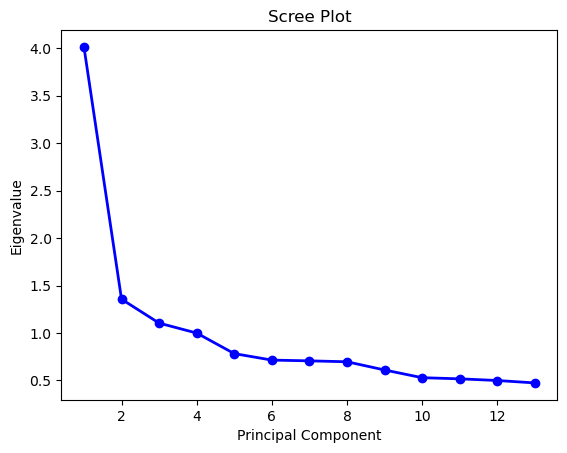

In [9]:
fa = FactorAnalyzer(rotation='promax')
fa.fit(Xc)
values = len(fa.get_eigenvalues()[0])

values = np.arange(1,values+1)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [10]:
mod = semopy.efa.explore_cfa_model(Xc, pval=0.05)
print(f"Modelo optimo: \n {mod}")

Modelo optimo: 
 eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk6 + sk7
eta3 =~ sk4 + sk2 + sk11 + sk5 + sk3 + sk9 + sk1 + sk8 + sk12
eta4 =~ sk11 + sk12 + sk13



5. Con los resultados obtenidos en la Pregunta 4, proponga un CFA donde cada variable solo se asocia con un factor. Entregue un nombre a cada factor que representa el concepto comun entre todas las variables. Reporte la importancia de cada medida (variable) a cada factor e indique la correlacion entre factores.

In [11]:
#sk9 a sk11 lo están relacionadas (Curiosidad)
#sk12 creemos que pertenece mejor agrupada con sk13
#Consideramos que sk7 y sk6 van juntas
#Ajustes:
#- Eliminar sk12 de eta1
#- Eliminar sk11 de eta4
#- Eliminar sk12, sk9 y sk11 de eta3
print(f"Modelo propio:")
new_mod= ""
new_mod += "curiosidad =~ sk11 + sk9 + sk10\n"
new_mod += "grupo =~ sk5 + sk7 + sk6 + sk8\n"
new_mod += "expre =~ sk4 + sk2 + sk3 + sk1\n"
new_mod += "crea =~ sk12 + sk13\n"
print(new_mod)
new_model = semopy.Model(new_mod)
new_out = new_model.fit(Xc)

Modelo propio:
curiosidad =~ sk11 + sk9 + sk10
grupo =~ sk5 + sk7 + sk6 + sk8
expre =~ sk4 + sk2 + sk3 + sk1
crea =~ sk12 + sk13



- La segmentacion que realizamos fue la siguiente
- interes: Agrupa medidas de curiosidad o interes sobre el entorno y varios
- grupo: Agrupa medidas de interaccion con otros niños
- expre: Agrupa medidas de habilidad de expresion
- crea: Agrupa medidas de habilidades creativas



            curiosidad     grupo     expre      crea
curiosidad    1.000000  0.263528  0.406338  0.515169
grupo         0.263528  1.000000  0.307399  0.234763
expre         0.406338  0.307399  1.000000  0.328498
crea          0.515169  0.234763  0.328498  1.000000
Notamos que con la agrupacion de factores anterior, las correlaciones entre datos son relativamente bajas, y que no superan el 51%


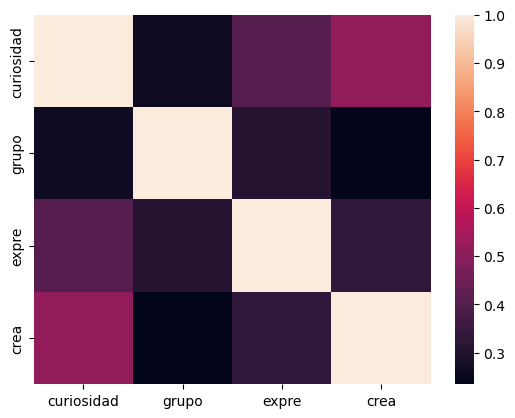

In [12]:
#Matriz de correlaciones
correlaciones = pd.DataFrame()
correlaciones["curiosidad"] = junaeb["sk11"] + junaeb["sk9"] + junaeb["sk10"]
correlaciones["grupo"]   = junaeb["sk5"] + junaeb["sk6"] + junaeb["sk7"] + junaeb["sk8"]
correlaciones["expre"]   = junaeb["sk1"] + junaeb["sk2"] + junaeb["sk3"] + junaeb["sk4"]
correlaciones["crea"]    = junaeb["sk12"] + junaeb["sk13"]
print(correlaciones.corr())
sns.heatmap(correlaciones.corr())

print("Notamos que con la agrupacion de factores anterior, las correlaciones entre datos son relativamente bajas, y que no superan el 51%")



Nota: notamos que sk12 es una habilidad que puede caer en interes o crea, lo que puede explicar la alta correlacion entre estos 2 grupos definidos.

In [13]:
print(new_out)
new_model.inspect(mode='list', what="names", std_est=True)


Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.159
Number of iterations: 40
Params: 0.797 1.076 -0.567 1.059 1.153 1.065 0.911 0.560 1.166 0.156 0.360 0.402 0.199 0.598 0.198 0.242 0.276 0.093 0.482 0.659 1.427 0.162 0.217 0.099 0.098 0.156 0.155 0.102 0.235 0.201 0.113 0.112


,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,sk11,~,curiosidad,1.000000,0.736661,-,-,-
1,sk9,~,curiosidad,0.796532,0.592461,0.006912,115.232801,0.0
2,sk10,~,curiosidad,1.076099,0.559267,0.009786,109.959856,0.0
3,sk5,~,grupo,1.000000,0.706671,-,-,-
4,sk7,~,grupo,-0.566527,-0.183866,0.015344,-36.922887,0.0
5,sk6,~,grupo,1.058685,0.571428,0.010515,100.679912,0.0
6,sk8,~,grupo,1.152839,0.547964,0.01177,97.94499,0.0
7,sk4,~,expre,1.000000,0.699609,-,-,-
8,sk2,~,expre,1.065240,0.648799,0.008616,123.639136,0.0
9,sk3,~,expre,0.911097,0.627046,0.007555,120.595122,0.0


A continuacion si comparamos los indices de ajuste del modelo optimizado con semopy y los de nuestro modelo propuesto, observamos que la agrupacion propuesta tiene mejor ajuste que el modelo de semopy.

In [14]:
semopy.calc_stats(new_model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,59,78,9094.725212,0.0,156539.1804,0.942249,0.941901,0.923192,0.941901,0.923652,0.051723,63.682264,350.24644,0.158868


In [15]:
model = semopy.Model(mod)
out=model.fit(Xc)
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,54,78,15252.084394,0.0,156539.1804,0.902864,0.902567,0.859263,0.902567,0.859692,0.070117,73.467148,404.806977,0.266426


La importancia de cada medida a cada factor está dada por el siguiente diagrama


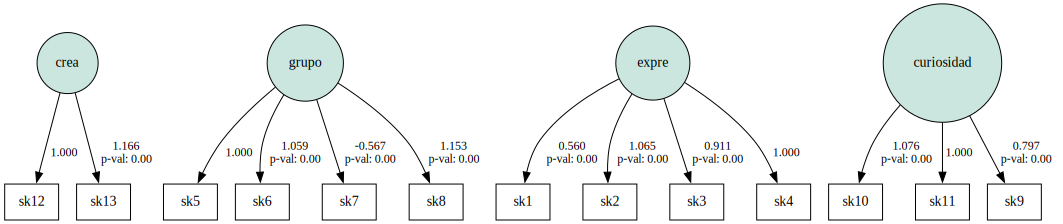

In [16]:
print("La importancia de cada medida a cada factor está dada por el siguiente diagrama")
semopy.semplot(new_model, "model_propio.png")

Finalmente, implemente un SEM completo usando la estructura propuesta en la Pregunta 5. En particular, estime un modelo donde los factores explican el nivel de actividad fisica, junto con otras variables que existen en la base de datos. Ademas utilice otras variables relevantes de la base de datos para explicar los factores latentes. Las variables a incluir en el modelo final deben tener sustento teorico y el modelo final debe optimizar el ajuste a los datos, en base a los criterios vistos en clase. Que puede concluir en base a sus resultados?

In [30]:
mod= ""
mod += "curiosidad =~ sk11 + sk9 + sk10\n"
mod += "grupo =~ sk5 + sk7 + sk6 + sk8\n"
mod += "expre =~ sk4 + sk2 + sk3 + sk1\n"
mod += "crea =~ sk12 + sk13\n"

mod += "grupo ~ vive_padre + vive_madre + area\n"
mod += "curiosidad ~ edad + educm + educp\n"
mod += "expre ~ vive_padre + vive_madre\n"

mod += "act_fisica ~ curiosidad + grupo + expre + crea\n"
mod += "imce ~ act_fisica + edad\n"

new_model = semopy.Model(mod)
new_out = new_model.fit(junaeb)

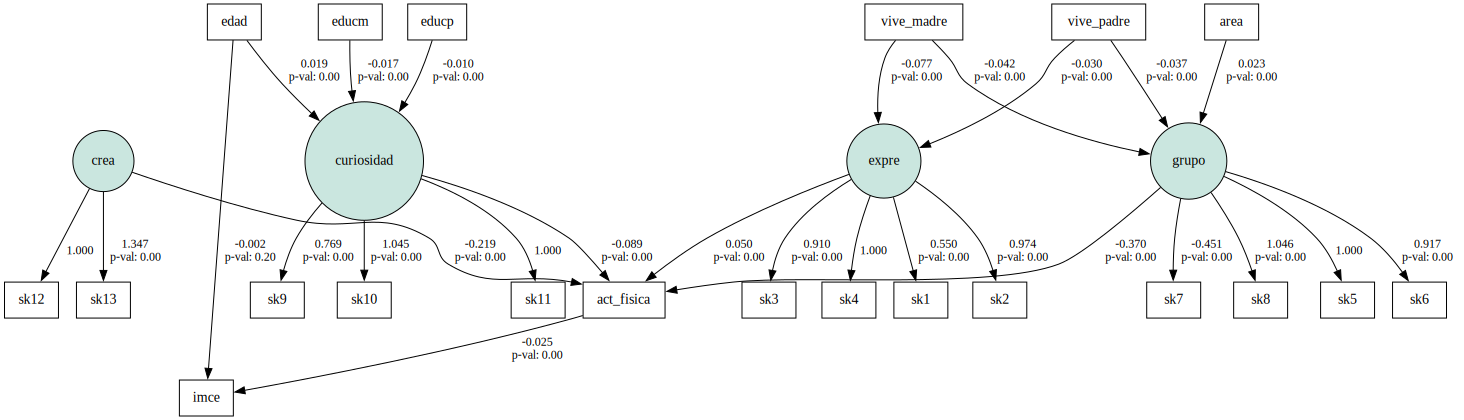

In [31]:
new_model.inspect(mode='list', what="names", std_est=True)
semopy.semplot(new_model, "model_propio.png")